# 로이터 데이터셋 로드하기

In [0]:
# 케라스에 IMDB,MNIST와 같이 포함되어 있음

from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


# 로이터 데이터셋을 텍스트로 디코딩하기

In [0]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [0]:
train_labels[10]

3

# 데이터 준비하기

In [0]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

# 레이블 인코딩

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


# 모델 정의하기

In [0]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일 하기

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

# 훈련 검증하기

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

# 모델 훈련하기

In [0]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))




Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 206us/step - loss: 0.1044 - acc: 0.9783 - val_loss: 0.1041 - val_acc: 0.9783
Epoch 2/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.1038 - acc: 0.9783 - val_loss: 0.1036 - val_acc: 0.9783
Epoch 3/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.1034 - acc: 0.9783 - val_loss: 0.1031 - val_acc: 0.9783
Epoch 4/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.1029 - acc: 0.9783 - val_loss: 0.1027 - val_acc: 0.9783
Epoch 5/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.1025 - acc: 0.9783 - val_loss: 0.1023 - val_acc: 0.9783
Epoch 6/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.1021 - acc: 0.9783 - val_loss: 0.1018 - val_acc: 0.9783
Epoch 7/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.1016 - acc: 0.9783 - val_loss: 0.1014 - val_acc:

# 훈련과 검증 손실 그리기

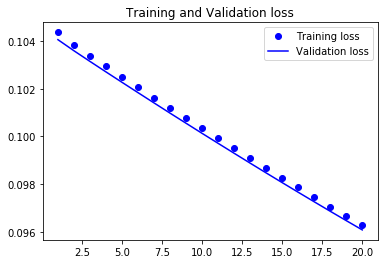

In [0]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()